In [446]:
import imageio
import matplotlib
import numpy as np
from PIL import Image
from matplotlib import cm
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [112]:
def set_fontsize(ax, fs):
    ax.title.set_fontsize(fs*1.3)
    ax.xaxis.label.set_fontsize(fs)
    ax.yaxis.label.set_fontsize(fs)
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs/1.25)

# Thorlabs BC106N-UV

Beamprofile of the cylindrically expanded beam for rotational cooling.

<img style="float: left;" src="cylindrical_expanded_beamprofile_2dprojection_#001.bmp">

In [148]:
def transformation(coordinates, im, scale):
    return -(coordinates[0] - im.shape[0]//2)*scale,\
           (coordinates[1] - im.shape[1]//2)*scale

In [149]:
im = imageio.imread('cylindrical_expanded_beamprofile_#001.bmp')[:,:,0]
# center_of_mass = ndimage.measurements.center_of_mass(im)
center_of_mass = np.array(np.where(im == im.max())).flatten()

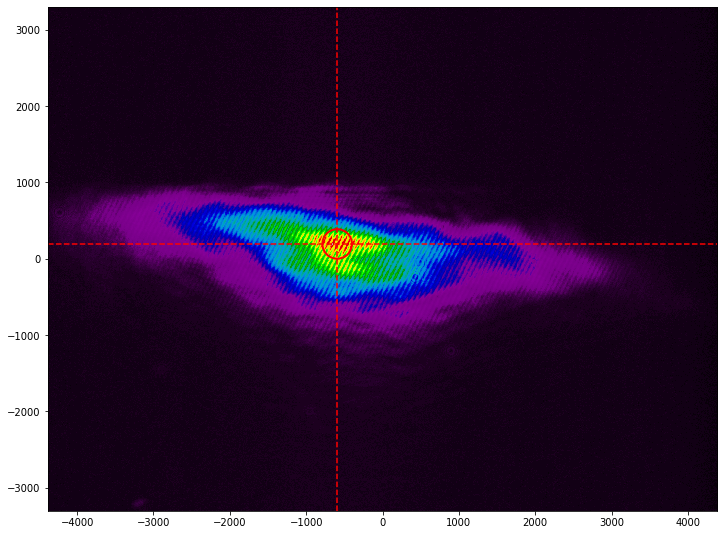

In [216]:
com = plt.Circle(transformation(center_of_mass, im, 6.45)[::-1], 30*6.45, edgecolor = 'r', fill = False, linewidth = 2)
fig, ax = plt.subplots(figsize = (12,12))
ax.imshow(im, aspect = 'equal', extent = np.array([-im.shape[1]//2, im.shape[1]//2, -im.shape[0]//2, im.shape[0]//2])*6.45,
          cmap = 'nipy_spectral')
ax.add_artist(com)
ax.axhline(transformation(center_of_mass, im, 6.45)[0], color = 'r', linestyle = '--')
ax.axvline(transformation(center_of_mass, im, 6.45)[1], color = 'r', linestyle = '--');

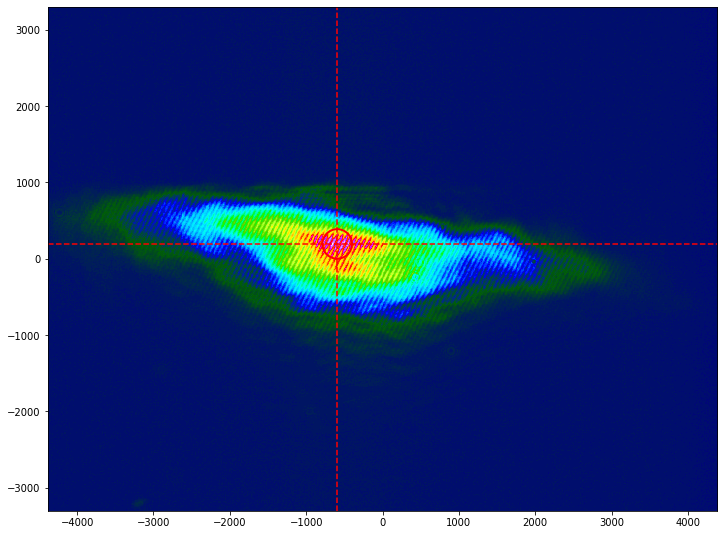

In [217]:
com = plt.Circle(transformation(center_of_mass, im, 6.45)[::-1], 30*6.45, edgecolor = 'r', fill = False, linewidth = 2)
fig, ax = plt.subplots(figsize = (12,12))
ax.imshow(im, aspect = 'equal', extent = np.array([-im.shape[1]//2, im.shape[1]//2, -im.shape[0]//2, im.shape[0]//2])*6.45,
          cmap = 'gist_ncar')
ax.add_artist(com)
ax.axhline(transformation(center_of_mass, im, 6.45)[0], color = 'r', linestyle = '--')
ax.axvline(transformation(center_of_mass, im, 6.45)[1], color = 'r', linestyle = '--');

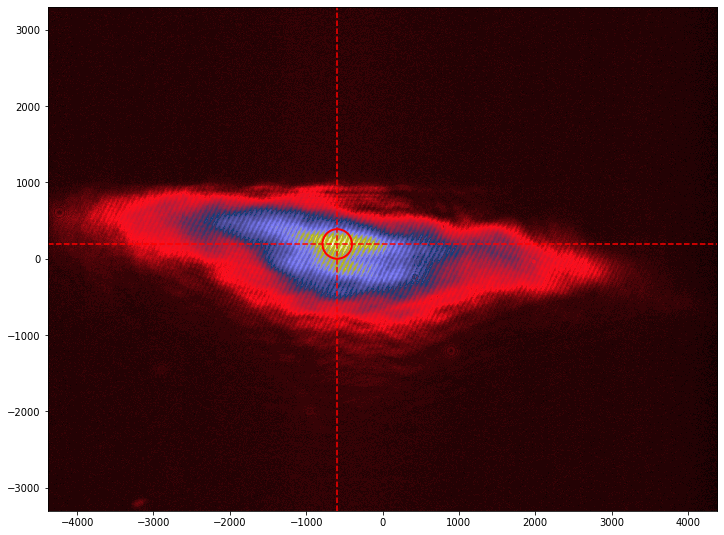

In [218]:
com = plt.Circle(transformation(center_of_mass, im, 6.45)[::-1], 30*6.45, edgecolor = 'r', fill = False, linewidth = 2)
fig, ax = plt.subplots(figsize = (12,12))
ax.imshow(im, aspect = 'equal', extent = np.array([-im.shape[1]//2, im.shape[1]//2, -im.shape[0]//2, im.shape[0]//2])*6.45,
          cmap = 'gist_stern')
ax.add_artist(com)
ax.axhline(transformation(center_of_mass, im, 6.45)[0], color = 'r', linestyle = '--')
ax.axvline(transformation(center_of_mass, im, 6.45)[1], color = 'r', linestyle = '--');

In [151]:
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

curve_x = im[center_of_mass[0], :]/im.max()
curve_y = im[:,center_of_mass[1]][::-1]/im.max()
popt_x, pcov_x = curve_fit(gaussian, x, curve_x, p0 = (curve_x.max(), x[curve_x.argmax()], x.ptp()/4))
popt_y, pcov_y = curve_fit(gaussian, y, curve_y, p0 = (curve_y.max(), y[curve_y.argmax()], y.ptp()/4))

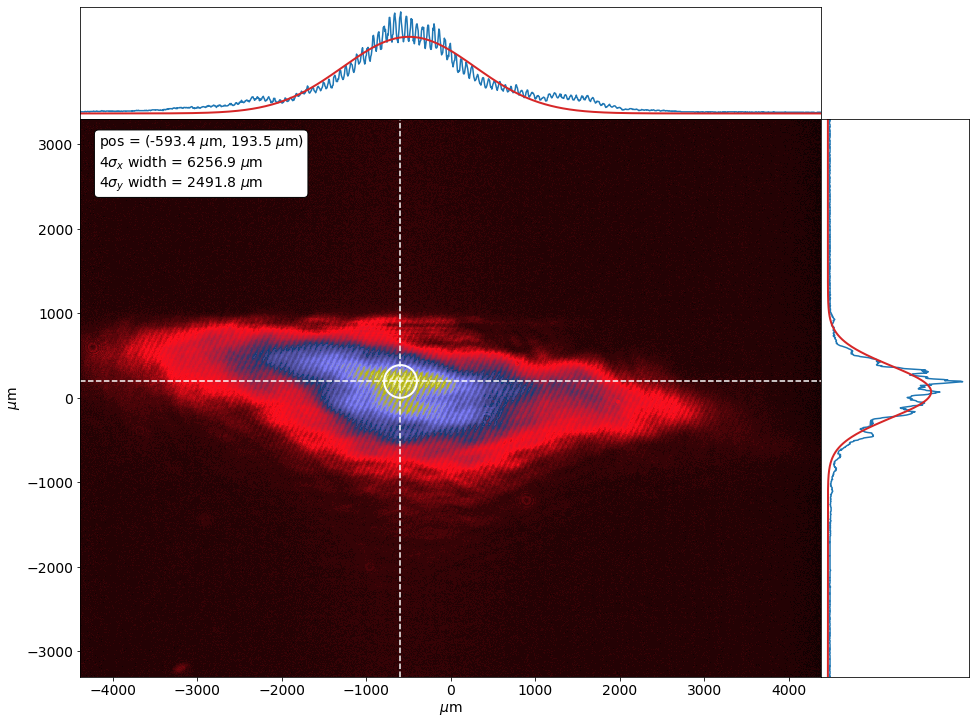

In [450]:
scaling = 3
w, h = matplotlib.figure.figaspect(im.shape[1]/im.shape[0])*scaling
fig = plt.figure(figsize=(h,w+0.11*scaling))
gs = fig.add_gridspec(nrows = 12, ncols = 12, wspace = 0, hspace = 0)

# Define the positions of the subplots.
ax0 = fig.add_subplot(gs[2:12, :10])
axx = fig.add_subplot(gs[:2, :10], sharex = ax0)
axy = fig.add_subplot(gs[2:12, 10:12], sharey = ax0)

axx.get_xaxis().set_visible(False)
axy.get_yaxis().set_visible(False)


img = ax0.imshow(im, aspect = 'equal', extent = np.array([-im.shape[1]//2, im.shape[1]//2, -im.shape[0]//2, im.shape[0]//2])*6.45,
                 cmap = 'gist_stern')
com = plt.Circle(transformation(center_of_mass, im, 6.45)[::-1], 30*6.45, edgecolor = 'w', fill = False, linewidth = 2)
ax0.axhline(transformation(center_of_mass, im, 6.45)[0], color = 'w', linestyle = '--')
ax0.axvline(transformation(center_of_mass, im, 6.45)[1], color = 'w', linestyle = '--')
ax0.add_artist(com)

ax0.set_xlabel(r'$\mu$m')
ax0.set_ylabel(r'$\mu$m')

x = np.linspace(*img.get_extent()[:2], im.shape[1])
y = np.linspace(*img.get_extent()[2:], im.shape[0])

axx.plot(x, im[center_of_mass[0], :]/im.max())
axx.set_xlim((x.min(), x.max()))
axy.plot(im[:,center_of_mass[1]][::-1]/im.max(), y)
axy.set_ylim((y.min(), y.max()))

axx.plot(x, gaussian(x, *popt_x), 'C3', lw = 2)
axy.plot(gaussian(y, *popt_y), y, 'C3', lw = 2)

textstr = f"pos = ({transformation(center_of_mass, im, 6.45)[1]:.1f} $\mu$m, {transformation(center_of_mass, im, 6.45)[0]:.1f} $\mu$m)\n"
textstr += f"4$\sigma_x$ width = {np.abs(popt_x[2])*8:.1f} $\mu$m\n"
textstr += f"4$\sigma_y$ width = {np.abs(popt_y[2])*8:.1f} $\mu$m"
props = dict(boxstyle='round', facecolor='w', alpha=1)

# place a text box in upper left in axes coords
ax0.text(0.025, 0.975, textstr, transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

axx.set_yticks([])
axy.set_xticks([])

set_fontsize(ax0, 14)
set_fontsize(axx, 14)
set_fontsize(axy, 14)

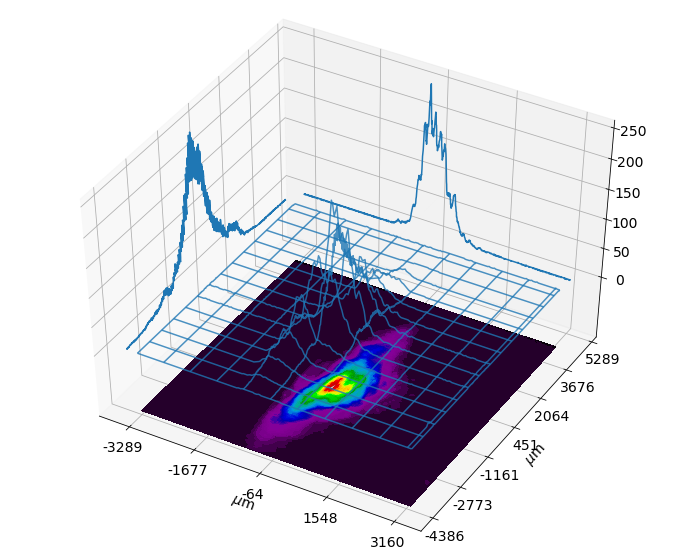

In [444]:
scaling = 5
im_resized = Image.fromarray(np.uint8(im))
im_resized = im_resized.resize( (im_resized.width // scaling, im_resized.height // scaling))
xx, yy = np.mgrid[0:np.array(im_resized).shape[0], 0:np.array(im_resized).shape[1]]

fig = plt.figure(figsize = (12,10))
ax = fig.gca(projection = '3d')

ax.plot_wireframe(xx, yy, np.array(im_resized), rstride = 100//scaling, cstride = 100//scaling, alpha =0.8)

cset = ax.contourf(xx, yy, np.array(im_resized), zdir='z', offset=-100,cmap='nipy_spectral', levels = 500//scaling)
ax.plot(np.linspace(0, np.array(im_resized).shape[1], im.shape[1]), im[center_of_mass[0], :], zdir = 'x', zs = -40/scaling, color = 'C0')
ax.plot(np.linspace(0, np.array(im_resized).shape[0], im.shape[0]), im[:, center_of_mass[1]], zdir = 'y', zs = (1400+40)/scaling, color = 'C0')

ax.set_zlim(-100,im.max())
ax.view_init(45, None)

ax.set_zticks([0,50,100,150,200,250])

ax.set_xticklabels([int((tick-np.array(im_resized).shape[0]/2)*scaling*6.45) for tick in ax.get_xticks()])
ax.set_yticklabels([int((tick-np.array(im_resized).shape[1]/2)*scaling*6.45) for tick in ax.get_yticks()])
ax.set_xlabel(r'$\mu$m')
ax.set_ylabel(r'$\mu$m')
set_fontsize(ax, 14)